# Milankovitch cycles
```{index} Milankovitch cycles
```

Milankovitch cycles are the effects of changes in Earth's movements on Earth's climate over thousands of years.

In 1920s, Serbian geophysicist and astronomer **Milutin Milanković** hypothesised that eccentricity, obliquity (axial tilt) and precession cause cyclical variations in solar radiation reaching Earth and influence climate patterns.

## Theory

```{sidebar} Eccentricity
<img src="https://climate.nasa.gov/internal_resources/1999" width="200">

Source: [NASA](https://climate.nasa.gov/news/2948/milankovitch-orbital-cycles-and-their-role-in-earths-climate/)
```
```{index} Eccentricity
```
1. **Eccentricity ($e$)** - this parameter describes how circular an orbit is:

    * $e=0$ - ciruclar orbit
    * $0<e<1$ - elliptic orbit
    * $e = 1$ - parabolic trajectory
    * $e>1$ - hyperbolic trajectory

    Most bodies in solar system have $e \ll 1$. Pluto and Mercury have $e=0.25$ and $e=0.21$. For eliptical orbits, the eccentricity can be calculated with periapsis and apoapsis:
    
    \begin{equation}
    e=\frac{r_a-r_p}{r_a+r_p},
    \end{equation}
    
    where $r_p=a(1-e)$, $r_a=a(1-e)$ and $a$ is the semi-major axis:
    
    
    ```{figure} ../images/orbit.png
    :width: 400px
    ```
    For Earth, the eccentricity varies between 0.0034 and 0.058 and is almost circular. The variations take place in 95,000 and 125,000 year cycles with beat period of 400,000 years. They loosely combine into 100,000 year cycles. Earth's eccentricity changes are caused primarily by perturbations from Saturn and Jupiter. 
    
```{sidebar} Obliquity
<img src="https://climate.nasa.gov/internal_resources/2000" width="200">

Source: [NASA](https://climate.nasa.gov/news/2948/milankovitch-orbital-cycles-and-their-role-in-earths-climate/)
```
```{index} Obliquity
```

2. **Obliquity** - obliquity is the angle at which the Earth is titled to the ecliptic plane. 

   Due to gravitational perturbations, primarily from Saturn and Jupiter, it varies between 22.1\\(^\circ\\) and 24.5\\(^\circ\\). Increased obliquity causes more pronounced seasonal differences in temperatures. On Earth, obliquity changes in 41,000 year cycles.
   
  
  ```{sidebar} Axial precession
<img src="https://climate.nasa.gov/internal_resources/2001" width="200">

Source: [NASA](https://climate.nasa.gov/news/2948/milankovitch-orbital-cycles-and-their-role-in-earths-climate/)
```
```{index} Precession
```
  
3. **Precession** - precession refers to direction of rotation axis and looks like a spinning top toy.
    
    Precession on Earth takes 21,000 year cycles. Axial precession makes contrasts in extremes between hemisphere. It also gradually changes when seasons start.
    
  

## Plotting Milankovitch cycles in time

Orbital forcing data can be downloaded from [here](https://biocycle.atmos.colostate.edu/shiny/Milankovitch/) based on Laskar *et al.* (2004) paper "A long term numerical solution for the insolation quantities of the Earth".

The dataset coprises of:
* time - in thousands of years from present
* eccentricity - calculated with $\frac{r_a-r_p}{r_a+r_p}$
* obliquity - angle in radians
* perihelion - angle between equinox & perihelion in radians
* insolation - at 65\\(^\circ\\) N at summer solstices ($W/m^2$)
* global insolation - solar flux in $W/m^2$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/milankovitch.csv")
data.head()

time  eccentricity  obliquity  perihelion  insolation  global_insolation
0 -20000      0.028373   0.413422    3.641942  511.372693         342.087719
1 -19999      0.027002   0.412171    3.927210  515.449123         342.074725
2 -19998      0.025691   0.410716    4.214007  517.235678         342.062901
3 -19997      0.024361   0.409094    4.498755  516.561670         342.051515
4 -19996      0.022902   0.407352    4.783758  513.516924         342.039710

The data does not contain precession. To display precession, we can use **precession index** calculated via:
\begin{equation}
\text{precession index} = e\times\sin{\varpi},\end{equation}
where $\varpi$ is the perihelion given in the database.

In [2]:
data["precession_index"] = data.eccentricity*(np.sin(data.perihelion))

Apart from orbital forcing, we can also plot some isotope data to find whether orbital cycles are reflected in data.

In this example, we downloaded composite antarctic ice core data with CO$_2$ record for past 800,000 years compiled by Bereiter *et al.* (2015). The data is available from NOAA and can be downloaded [here](https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt).

In [3]:
antarctica_data = pd.read_csv('data/antarctica_co2_composite.csv')
antarctica_data.head()

age_gas_calBP  co2_ppm  co2_1s_ppm
0         -51.03   368.02        0.06
1         -48.00   361.78        0.37
2         -46.28   359.65        0.10
3         -44.41   357.11        0.16
4         -43.08   353.95        0.04

Now, having both datasets we can plot on the same graph precession index, obliquity, eccentricity, insolation and CO$_2$ record from Antarctica:

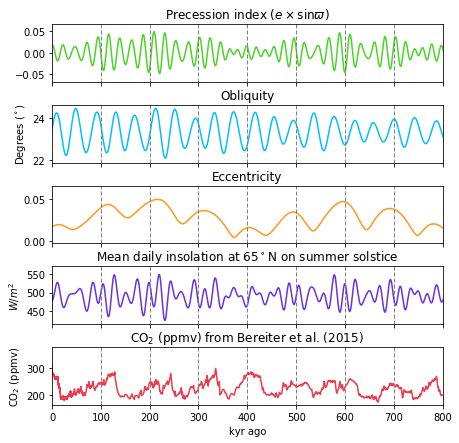

In [4]:
fig, axes = plt.subplots(5,1, figsize=(7,7), sharex=True)

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax4 = axes[3]
ax5 = axes[4]

ax1.plot(-data.time, data.precession_index, color="#4dd327ff")
ax2.plot(-data.time, np.rad2deg(data.obliquity), color="#00bfffff")
ax3.plot(-data.time, data.eccentricity, color="#ff981cff")
ax4.plot(-data.time, data.insolation, color="#6931dfff")
ax5.plot(antarctica_data.age_gas_calBP/1000., antarctica_data.co2_ppm, color="#eb3d4eff")

ax1.set_title(r"Precession index ($e\times\sin{\varpi}$)")
ax2.set_title("Obliquity")
ax3.set_title("Eccentricity")
ax4.set_title("Mean daily insolation at 65$^\circ$N on summer solstice")
ax5.set_title("CO$_2$ (ppmv) from Bereiter et al. (2015)")

ax1.set_ylabel("")
ax2.set_ylabel("Degrees ($^\circ$)")
ax3.set_ylabel("")
ax4.set_ylabel("$W/m^2$")
ax5.set_ylabel("CO$_2$ (ppmv)")

for ax in axes:
    for i in range(8):
        ax.axvline(100+100*i, color='gray', dashes=(4,2), lw=1)

plt.xlim(0, 800)
plt.subplots_adjust(hspace=0.4)
plt.xlabel("kyr ago")
plt.show()

Looking at the graph, we can see that CO$_2$ peaks align with peaks in eccentricity, at $\sim$ 100,000 years intervals. Additionally, higher changes in insolation correlate with higher precession index.

## Interactive plot of the orbital cycles

In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1, shared_xaxes=True)

fig.add_trace(go.Scatter(x=data.time, y=data.precession_index,
                         name="Precession Index",
                         line=dict(color="limegreen", width=1.5)), row=1,col=1)

fig.add_trace(go.Scatter(x=data.time, y=data.eccentricity,
                         name="Eccentricity",
                         line=dict(color="cyan", width=1.5)), row=3,col=1)

fig.add_trace(go.Scatter(x=data.time, y=np.rad2deg(data.obliquity),
                         name="Obliquity",
                         line=dict(color="orange", width=1.5)), row=2,col=1)


fig.add_trace(go.Scatter(x=data.time, y=data.insolation,
                         name="Mean daily insolation at 65N on summer solstice",
                         line=dict(color="orchid", width=1.5)), row=4,col=1)


fig.update_layout(xaxis_rangeslider_visible=False,
                 legend_orientation="h",
                 xaxis4_title='Kiloyears from present',
                 plot_bgcolor="white",
                 title="Milankovitch forcing throughout geological history")

fig.update_yaxes(title="", row=1, col=1, fixedrange=True)
fig.update_yaxes(title_text=r"Degrees", 
                 row=2, col=1, fixedrange=True)
fig.update_yaxes(title="", 
                 row=3, col=1, fixedrange=True, range=[-0.1,0.1])
fig.update_yaxes(title_text=r"W/m^2", 
                 row=4, col=1, fixedrange=True)

fig.show()